In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
sns.set_context('notebook',font_scale=1.5, rc={'lines.linewidth':1.5})

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score  
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
#loading the dataset
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [5]:
#display the count of null value
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [6]:
df = df.drop(columns = ['step','type','nameOrig','nameDest','isFlaggedFraud'])
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,9839.64,170136.0,160296.36,0.0,0.0,0
1,1864.28,21249.0,19384.72,0.0,0.0,0
2,181.00,181.0,0.00,0.0,0.0,1
3,181.00,181.0,0.00,21182.0,0.0,1
4,11668.14,41554.0,29885.86,0.0,0.0,0


0    8213
1    8213
Name: isFraud, dtype: int64


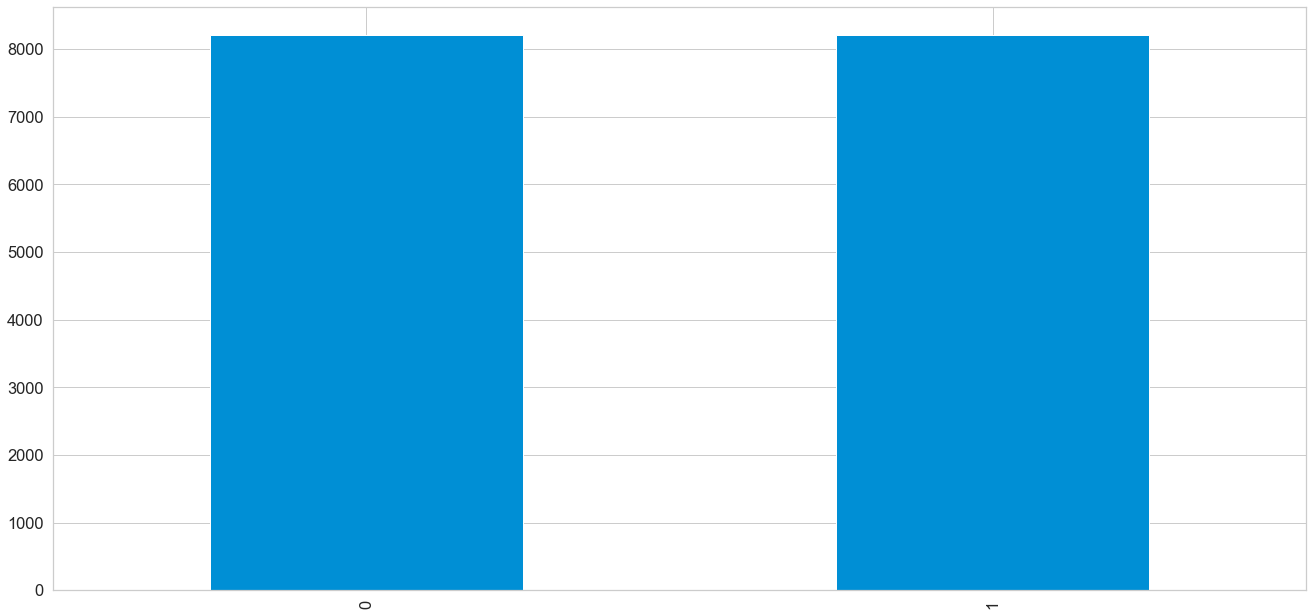

In [7]:
from sklearn.utils import resample

#Dividing majority and minorty classes
data_major = df[df.isFraud==0]
data_minor = df[df.isFraud==1]

#Down sampling majority class
data_major_sample = resample(data_major, replace=False, n_samples=8213, random_state=0)

#Combine down sampled majority and minority class
data_sample = pd.concat([data_major_sample, data_minor])

#Display count of data points in both class
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = data_sample["isFraud"].map(lambda x: color_wheel.get(x + 1))
print(data_sample.isFraud.value_counts())
p = data_sample.isFraud.value_counts().plot(kind="bar")

In [8]:
x = data_sample.drop(['isFraud'], axis=1)
y = pd.DataFrame(data_sample['isFraud'])

In [9]:
x

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1417484,265803.35,0.00,0.00,751669.39,1017472.74
6216425,11278.28,0.00,0.00,220970.84,232249.12
3906122,16363.06,35966.16,19603.10,0.00,0.00
731681,107223.31,20752629.71,20859853.02,804594.62,571711.22
3949919,3678.25,0.00,0.00,0.00,0.00
...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13
6362616,6311409.28,6311409.28,0.00,0.00,0.00
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,850002.52,850002.52,0.00,0.00,0.00


In [10]:
y

,isFraud
1417484,0
6216425,0
3906122,0
731681,0
3949919,0
...,...
6362615,1
6362616,1
6362617,1
6362618,1


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [12]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (11498, 5)
y_train shape:  (11498, 1)
x_test shape:  (4928, 5)
y_test shape:  (4928, 1)


In [13]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.fit_transform(x_test)

In [27]:
x_train

array([[-0.00511265, -0.13792709, -0.21434272, -0.22546381, -0.30851273],
       [-0.42284805, -0.37780334, -0.21434272, -0.22546381, -0.30851273],
       [-0.43350414, -0.38392239, -0.21434272, -0.22546381, -0.30630459],
       ...,
       [ 0.51275593,  0.15944867, -0.21434272, -0.22546381, -0.30851273],
       [ 4.94170133,  3.86885483,  1.27770751, -0.22546381, -0.30851273],
       [-0.10491762, -0.38080034, -0.21434272, -0.22211426, -0.15447779]])

In [28]:
x_test

array([[ 2.67627787,  1.39862786, -0.20422388, -0.12092075,  0.82348527],
       [-0.37515275, -0.33436235, -0.20422388, -0.16213727, -0.23221887],
       [-0.1847921 , -0.29920716, -0.20422388,  0.85747301,  0.83441794],
       ...,
       [-0.38623293, -0.34065508, -0.20422388, -0.16213727, -0.23221887],
       [-0.4052669 ,  3.30390114,  4.78947546,  0.00860383, -0.08141735],
       [-0.43714784, -0.36957104, -0.20422388, -0.16213727, -0.22905372]])

In [14]:
#Fitting Decision Tree classifier to the training set  

classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [16]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [18]:
cm

array([[2421,   17],
       [1626,  864]], dtype=int64)

In [19]:
data_cm = pd.DataFrame(cm)
data_cm.rename(columns={0:'Not Fraud', 1:'Fraud'}, index={0:'Not Fraud',1:'Fraud'},inplace=True)
data_cm

,Not Fraud,Fraud
Not Fraud,2421,17
Fraud,1626,864


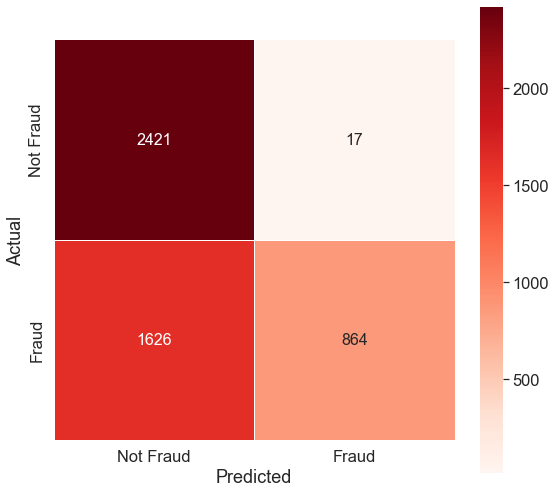

In [20]:
fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(data_cm, fmt = '.0f',
           cmap='Reds', linewidth =1,
           square=True, annot=True, annot_kws={'fontsize':16},ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()

In [33]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 5 features as input.